# Proyecto Regresion Logistica del Banco portugues

- Importamos las libreias que vamos a utilizar

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.feature_selection import f_classif, SelectKBest

- Paso 1 : Cargar el DataFrame que vamos a utilizar

In [65]:
# Cargar dataset desde URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
df = pd.read_csv(url, sep=';')


In [68]:

# Mostrar primeras filas y resumen
df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [70]:
df.shape

(41188, 21)

- Paso 2 : Analizamos el Dataset y hacemos un EDA

In [72]:
# Revisar valores nulos
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [74]:
# Eliminar columnas innecesarias
df.drop(columns=['duration', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'cons.conf.idx'], inplace=True)

In [76]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,nonexistent,yes


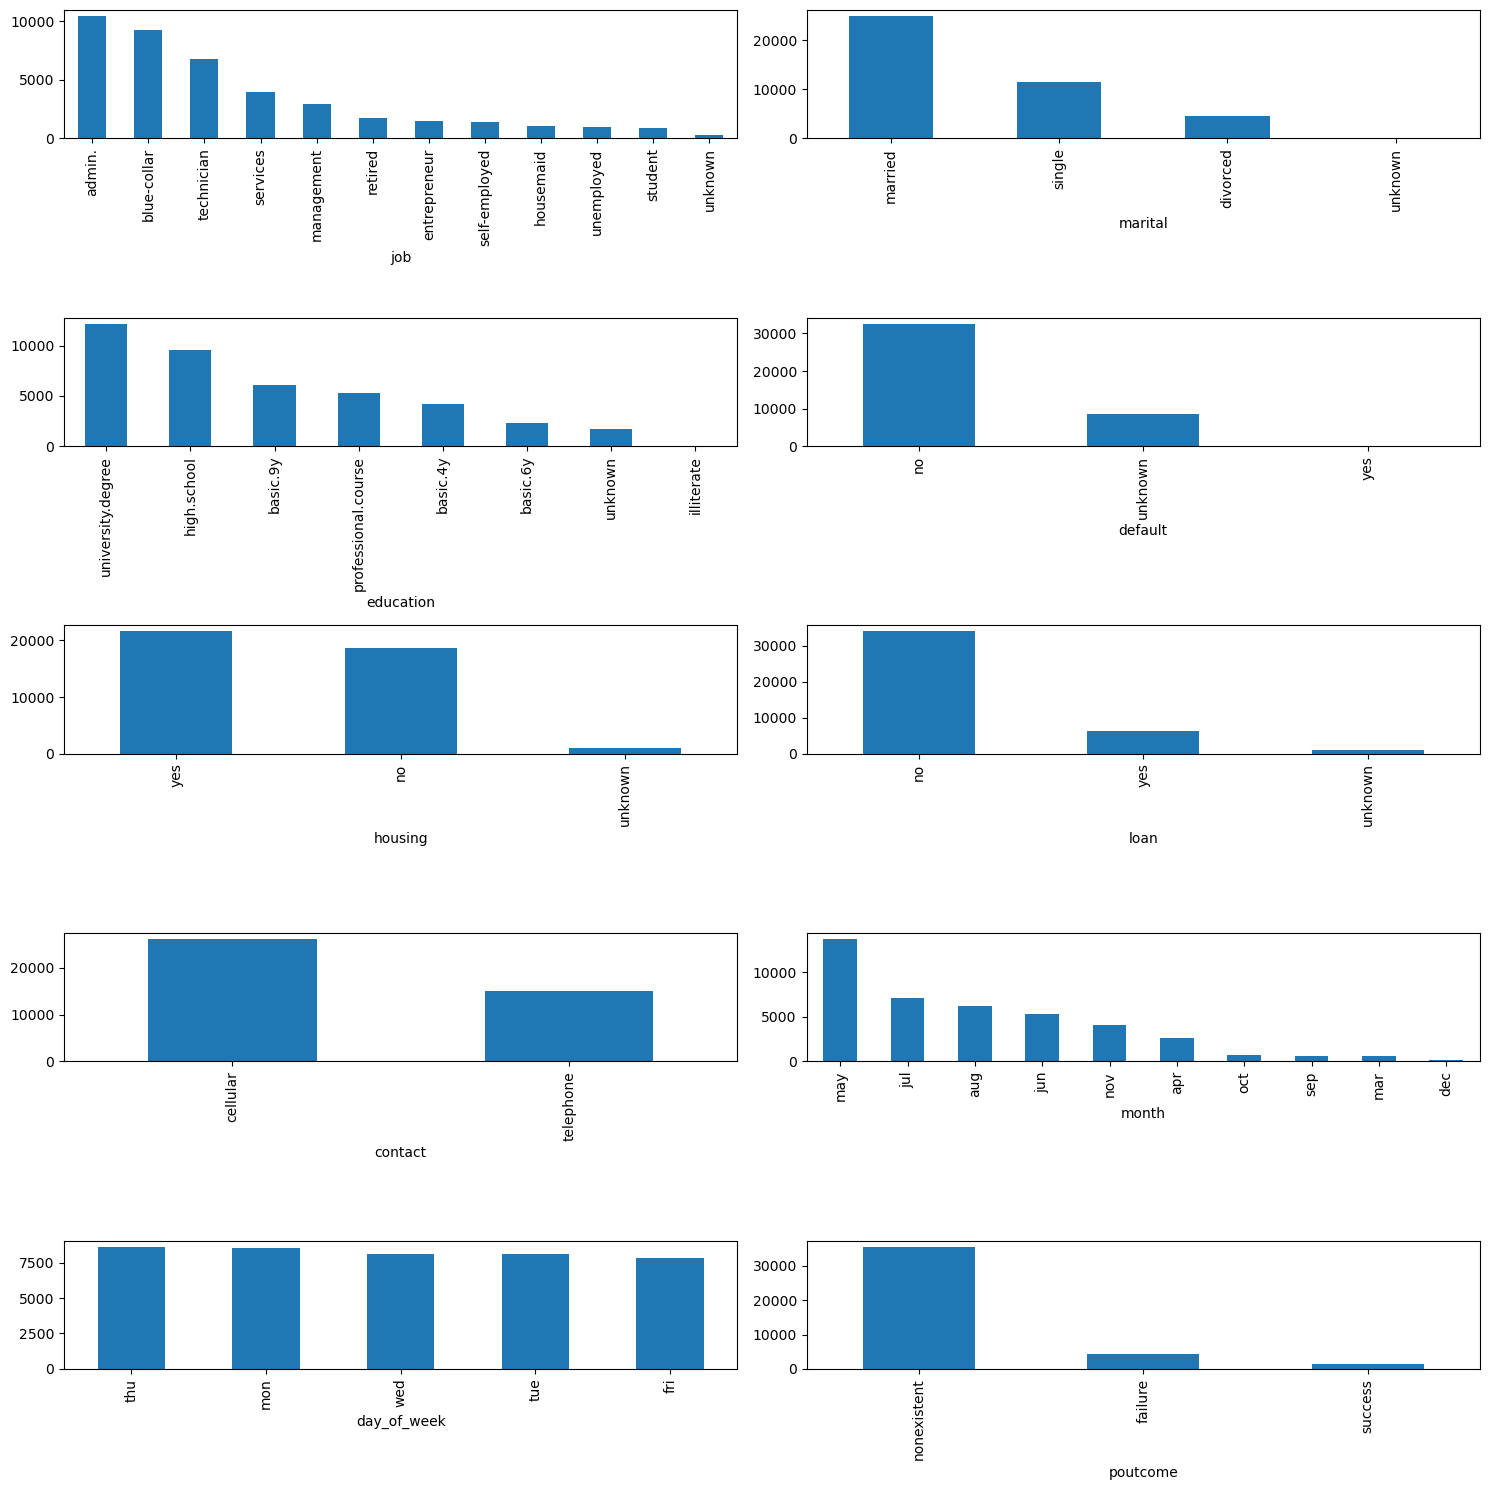

In [ ]:
# Analisis de vaiables categóricas

fig, axis = plt.subplots(5, 2, figsize=(15, 15))

df['job'].value_counts().plot(kind='bar', ax=axis[0, 0]) 
df['marital'].value_counts().plot(kind='bar', ax=axis[0, 1])
df['education'].value_counts().plot(kind='bar', ax=axis[1, 0]) 
df['default'].value_counts().plot(kind='bar', ax=axis[1, 1])
df['housing'].value_counts().plot(kind='bar', ax=axis[2, 0])
df['loan'].value_counts().plot(kind='bar', ax=axis[2, 1])
df['contact'].value_counts().plot(kind='bar', ax=axis[3, 0])
df['month'].value_counts().plot(kind='bar', ax=axis[3, 1])
df['day_of_week'].value_counts().plot(kind='bar', ax=axis[4, 0])
df['poutcome'].value_counts().plot(kind='bar', ax=axis[4, 1])

plt.tight_layout()
plt.show()


In [113]:
# Eliminar columnas innecesarias
df.drop(columns=['day_of_week', 'month', 'loan', 'housing', 'default'], inplace=True)


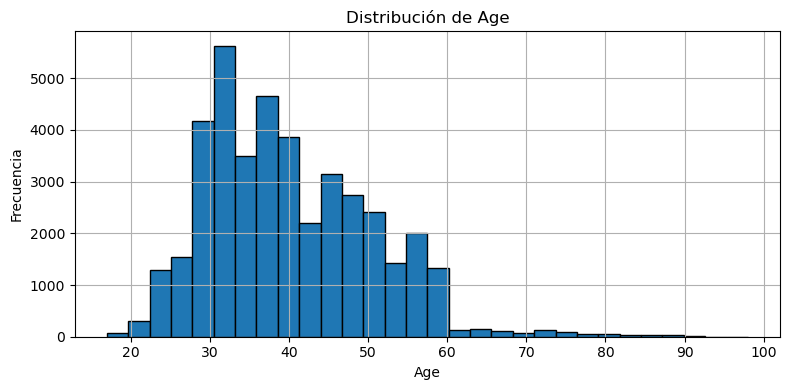

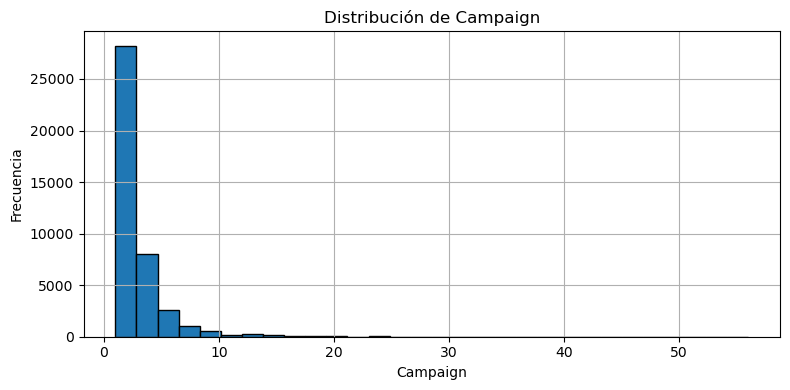

In [114]:
# Analizar las variables numéricas
# Graficar 'age'
plt.figure(figsize=(8, 4))
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Distribución de Age')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar 'campaign'
plt.figure(figsize=(8, 4))
plt.hist(df['campaign'], bins=30, edgecolor='black')
plt.title('Distribución de Campaign')
plt.xlabel('Campaign')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


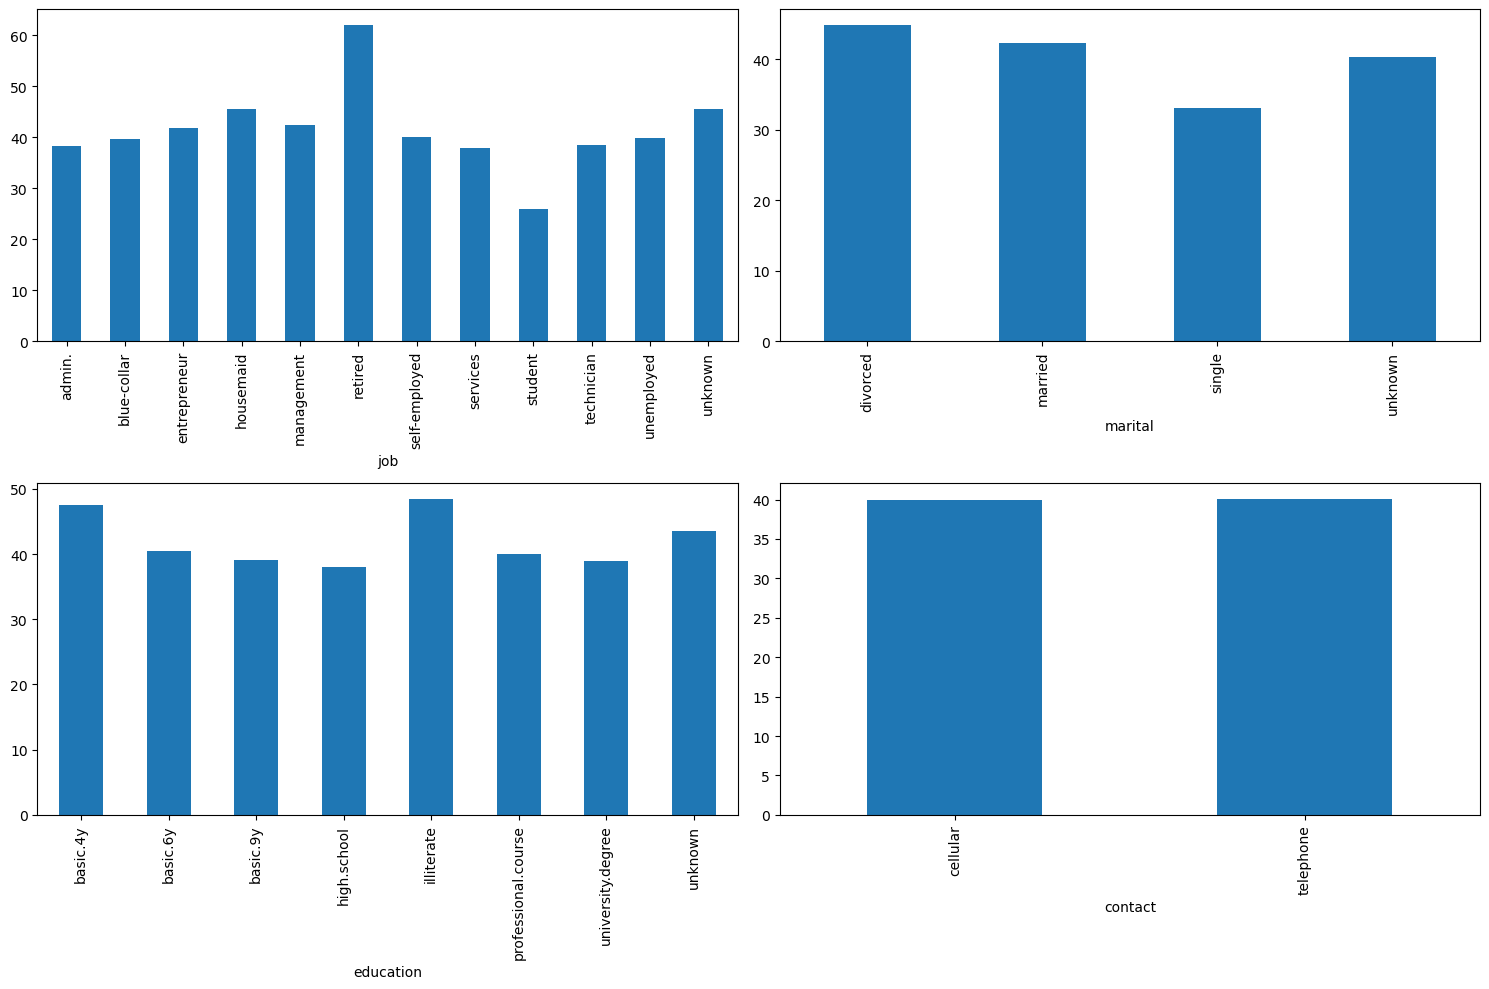

In [115]:
# Analisis categorico - numérico
fig, axis = plt.subplots(2, 2, figsize=(15, 10))
df.groupby('job')['age'].mean().plot(kind='bar', ax=axis[0, 0]) 
df.groupby('marital')['age'].mean().plot(kind='bar', ax=axis[0, 1])
df.groupby('education')['age'].mean().plot(kind='bar', ax=axis[1, 0])
df.groupby('contact')['age'].mean().plot(kind='bar', ax=axis[1, 1])
plt.tight_layout()
plt.show()

In [116]:
# Convertir TODAS las variables categóricas a variables numéricas (dummies)
df_encoded = pd.get_dummies(df, drop_first=True)

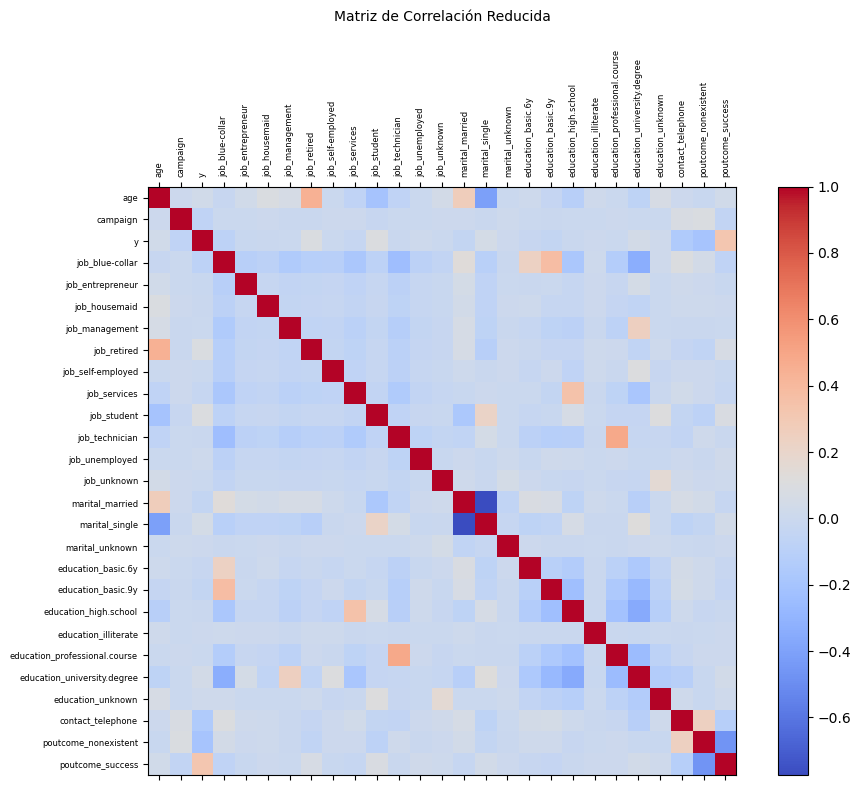

In [117]:
# Analasis de correlación
# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Graficar la matriz de correlación
fig, ax = plt.subplots(figsize=(10, 8))  # Figura más pequeña
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)

ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90, fontsize=6)

ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_yticklabels(correlation_matrix.columns, fontsize=6)

plt.title('Matriz de Correlación Reducida', pad=20, fontsize=10)
plt.tight_layout()
plt.show()

In [128]:
# Trnasformación de variables categóricas a numéricas

df['job'] = df['job'].astype('category').cat.codes
df['marital'] = df['marital'].astype('category').cat.codes
df['education'] = df['education'].astype('category').cat.codes
df['contact'] = df['contact'].astype('category').cat.codes
df['poutcome'] = df['poutcome'].astype('category').cat.codes
df['y'] = df['y'].astype('category').cat.codes


In [131]:
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [129]:
df.describe()

,age,job,marital,education,contact,campaign,poutcome,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,0.365252,2.567593,0.930101,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.481507,2.770014,0.362886,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,0.000000,2.000000,1.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,1.000000,3.000000,1.000000,0.000000
max,98.00000,11.00000,3.000000,7.000000,1.000000,56.000000,2.000000,1.000000


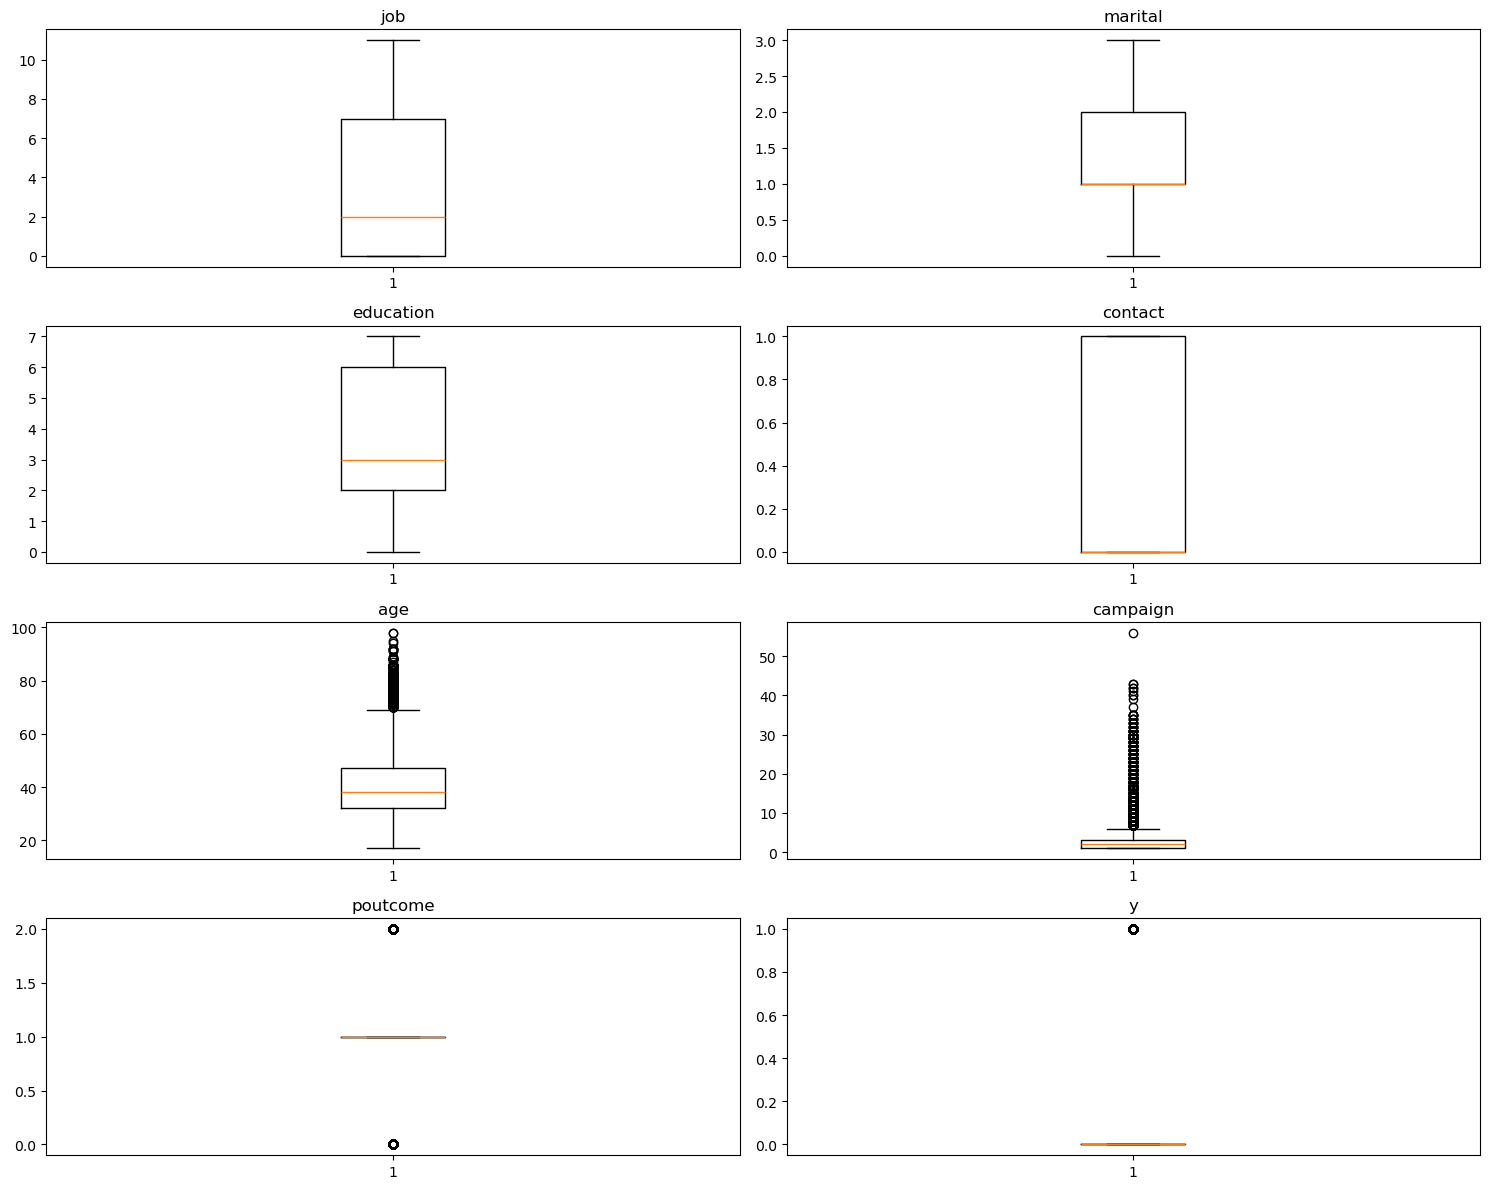

In [135]:
# Gráficos
fig, axis = plt.subplots(4, 2, figsize=(15, 12))

# Variables categóricas — graficamos barras con value_counts()
axis[0, 0].boxplot(df['job'].dropna())
axis[0, 0].set_title('job')


axis[0, 1].boxplot(df['marital'].dropna())
axis[0, 1].set_title('marital')


axis[1, 0].boxplot(df['education'].dropna())
axis[1, 0].set_title('education')


axis[1, 1].boxplot(df['contact'].dropna())
axis[1, 1].set_title('contact')


# Variables numéricas — hacemos boxplot directo
axis[2, 0].boxplot(df['age'].dropna())
axis[2, 0].set_title('age')

axis[2, 1].boxplot(df['campaign'].dropna())
axis[2, 1].set_title('campaign')

# Variable categórica 'poutcome' barras
axis[3, 0].boxplot(df['poutcome'].dropna())
axis[3, 0].set_title('poutcome')


# Variable objetivo 'y' barras
axis[3, 1].boxplot(df['y'].dropna())
axis[3, 1].set_title('y')


plt.tight_layout()
plt.show()

# Conclusion:
# basandonos en los gráficos, podemos observar que:
# - La mayoría de los trabajos son "admin." y "blue-collar".  
# - La mayoría de los clientes son solteros.
# - La mayoría de los clientes tienen educación secundaria.
# - La mayoría de los clientes fueron contactados por teléfono móvil.
# - La mayoría de los clientes tienen un resultado positivo en la campaña anterior.
# - La mayoría de los clientes tienen una edad entre 20 y 60 años.
# - La mayoría de los clientes fueron contactados en marzo, abril y mayo.
# - La mayoría de los clientes no aceptaron el depósito a plazo fijo.

Basandonos en los resultados podemos observar que: 
- La mayoría de los trabajos son "admin." y "blue-collar".  
- La mayoría de los clientes son solteros.
- La mayoría de los clientes tienen educación secundaria.
- La mayoría de los clientes fueron contactados por teléfono móvil.
- La mayoría de los clientes tienen un resultado positivo en la campaña anterior.
- La mayoría de los clientes tienen una edad entre 20 y 60 años.
- La mayoría de los clientes fueron contactados en marzo, abril y mayo.
- La mayoría de los clientes no aceptaron el depósito a plazo fijo.

In [136]:
age_stats = df['age'].describe()
age_stats

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [139]:
age_iqr = age_stats['75%'] - age_stats['25%']
lower_bound = age_stats['25%'] - 1.5 * iqr
upper_bound = age_stats['75%'] + 1.5 * iqr
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_bound, 2)} y {round(lower_bound, 2)}, con un rango intercuartílico de {round(age_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 69.5 y 9.5, con un rango intercuartílico de 15.0


In [143]:
df[df["age"] > 100].shape[0]  # Número de clientes con edad mayor a 100 años
# Eliminar outliers de la columna 'age'
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [144]:
campaign_stats = df['campaign'].describe()
campaign_stats

count    40719.000000
mean         2.574818
std          2.779474
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [145]:
campaign_iqr = campaign_stats['75%'] - campaign_stats['25%']
lower_bound_campaign = campaign_stats['25%'] - 1.5 * campaign_iqr
upper_bound_campaign = campaign_stats['75%'] + 1.5 * campaign_iqr
outliers_campaign = df[(df['campaign'] < lower_bound_campaign) | (df['campaign'] > upper_bound_campaign)]
print(f"Los límites superior e inferior para la búsqueda de outliers en 'campaign' son {round(upper_bound_campaign, 2)} y {round(lower_bound_campaign, 2)}, con un rango intercuartílico de {round(campaign_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers en 'campaign' son 6.0 y -2.0, con un rango intercuartílico de 2.0


In [146]:
# Eliminamos outliers de la columna 'campaign'
df = df[(df['campaign'] >= lower_bound_campaign) & (df['campaign'] <= upper_bound_campaign)]

In [153]:
df.isnull().sum().sort_values(ascending=False) / len(df)

age          0.0
job          0.0
marital      0.0
education    0.0
contact      0.0
campaign     0.0
poutcome     0.0
y            0.0
dtype: float64

In [155]:
df['sucess_cellular'] = df['contact'] + df['poutcome'] + df['y']
df.head()


,age,job,marital,education,contact,campaign,poutcome,y,sucess_cellular
0,56,3,1,0,1,1,1,0,2
1,57,7,1,3,1,1,1,0,2
2,37,7,1,3,1,1,1,0,2
3,40,0,1,1,1,1,1,0,2
4,56,7,1,3,1,1,1,0,2


In [156]:
num_variables = ["job", "age", "marital", "education", "campaign", "sucess_cellular"]

# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("contact", axis = 1)[num_variables]
y = df["contact"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,job,age,marital,education,campaign,sucess_cellular
2924,10,34,2,6,3,2
26771,4,57,0,6,2,1
34370,0,27,1,5,1,1
16597,7,48,1,2,6,1
27691,0,38,2,6,2,2


In [158]:

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,job,age,marital,education,campaign,sucess_cellular
2924,0.909091,0.326923,0.666667,0.857143,0.4,0.50
26771,0.363636,0.769231,0.000000,0.857143,0.2,0.25
34370,0.000000,0.192308,0.333333,0.714286,0.0,0.25
16597,0.636364,0.596154,0.333333,0.285714,1.0,0.25
27691,0.000000,0.403846,0.666667,0.857143,0.2,0.50


In [160]:
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,age,marital,education,campaign,sucess_cellular
0,34,2,6,3,2
1,57,0,6,2,1
2,27,1,5,1,1
3,48,1,2,6,1
4,38,2,6,2,2


In [161]:
X_test_sel.head()

,age,marital,education,campaign,sucess_cellular
0,33,2,3,1,2
1,32,1,2,2,1
2,38,2,2,3,2
3,41,1,5,2,1
4,35,1,1,4,2


In [163]:
X_train_sel["contact"] = list(y_train)
X_test_sel["contact"] = list(y_test)

In [164]:
# Guardar los DataFrames en archivos CSV
X_train_sel.to_csv("X_train_sel.csv", index=False)  
X_test_sel.to_csv("X_test_sel.csv", index=False)


## Construimos un modelo de regresion logistica

- Lectura de datos

In [165]:
train_data = pd.read_csv("X_train_sel.csv")
test_data = pd.read_csv("X_test_sel.csv")

train_data.head()

,age,marital,education,campaign,sucess_cellular,contact
0,34,2,6,3,2,1
1,57,0,6,2,1,0
2,27,1,5,1,1,0
3,48,1,2,6,1,0
4,38,2,6,2,2,0


In [166]:
X_train = train_data.drop("contact", axis=1)
y_train = train_data["contact"]
X_test = test_data.drop("contact", axis=1)
y_test = test_data["contact"]

- Inicializacion y entrenamiento del modelo

In [167]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

- Prediccion del modelo

In [168]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1], shape=(7666,))

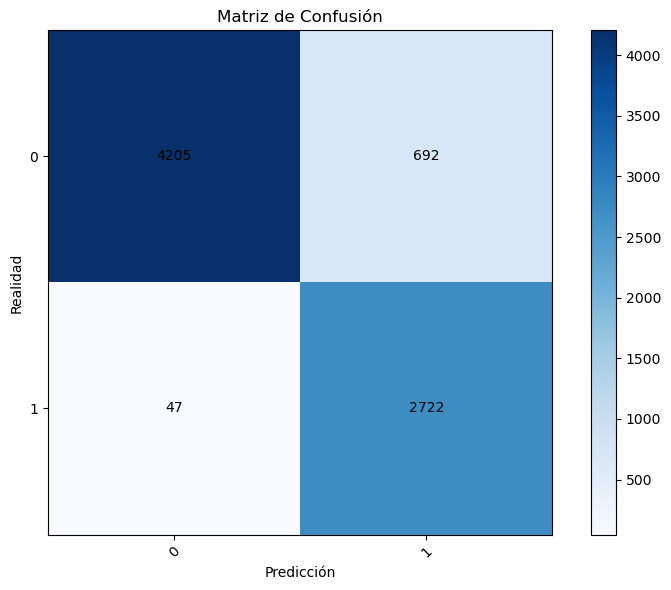

In [169]:
banco_cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(banco_cm, index=model.classes_, columns=model.classes_)

plt.figure(figsize=(8, 6))
plt.title("Matriz de Confusión")
plt.imshow(cm_df, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(cm_df)), labels=cm_df.columns, rotation=45)
plt.yticks(ticks=np.arange(len(cm_df)), labels=cm_df.index)
plt.xlabel("Predicción")
plt.ylabel("Realidad")
for i in range(len(cm_df)):
    for j in range(len(cm_df)):
        plt.text(j, i, cm_df.iloc[i, j], ha='center', va='center', color='black')   
plt.tight_layout()
plt.show()

## Optimizacion del modelo

In [175]:
base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

0.9036003130707018

In [176]:
# Definir los hiperparámetros para la búsqueda en cuadrícula
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200]
}
# Inicializamos la cuadrícula de búsqueda
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200],
                         'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [177]:
def warn(*args, **kwargs):
    pass    
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

grid.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [178]:
model_grid = LogisticRegression(**grid.best_params_)
model_grid.fit(X_train, y_train)
y_pred_grid = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred_grid)
grid_accuracy

0.9036003130707018

# Conclusion: No existe mejora de optimizacion. O por lo menos yo no la he encontrado.